In [33]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [40]:
ABF_out = pd.read_csv('ABF_bias_out.txt',sep='\t')
ABF_out.columns = ['Bin','Xi','Hist','Mean Grad', 'bias', 'dF', 'dF geom']

Define $\nabla B$ with tent functions:
\begin{equation}
\nabla B(x)= \frac{1}{\Delta x}
\end{equation}

In [35]:
D = np.array(ABF_out['bias'])
dx = ABF_out['Xi'][1] - ABF_out['Xi'][0]
B = np.array([1/dx for i in range(len(ABF_out))])
alpha = np.array([1.0 for i in range(len(ABF_out))])

Define error funktion:
\begin{equation}
 err = \bigg|\big(\sum_l \alpha_l \nabla B_l(x)\big)-D_ {ABF}\bigg|^2
\end{equation}

In [36]:
def error(alpha):
    return np.linalg.norm(alpha*B-D)

Minimize error funktion:

In [37]:
result = minimize(error, alpha, method='L-BFGS-B')
print('Iterations:\t%14.10f' % (result['nit']))
print('Error:\t\t%14.10f' % (result['fun']))

Iterations:	  6.0000000000
Error:		  0.0000000416


Get free energy from coefficients with B=1 in the center of each bin:
\begin{equation}
 F=\sum_l \alpha_l B_l(x)=\sum_l \alpha_l
\end{equation}

In [38]:
F = np.array([np.sum(result['x'][0:i]) for i in range(len(ABF_out))])
F -= F.min()

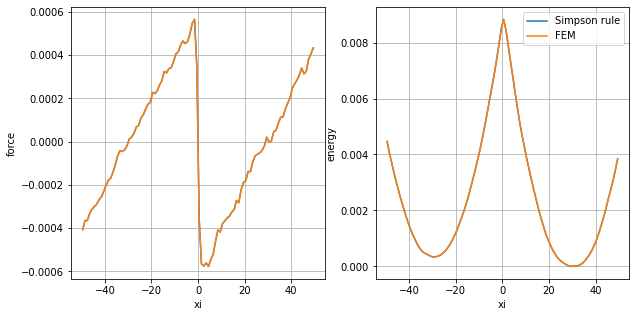

In [39]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
axs[0].plot(ABF_out['Xi'],ABF_out['bias'],label='Simpson rule')
axs[0].plot(ABF_out['Xi'],result['x'],label='FEM')
axs[1].plot(ABF_out['Xi'],ABF_out['dF'],label='Simpson rule')
axs[1].plot(ABF_out['Xi'],F,label='FEM')
axs[0].grid()
axs[1].grid()
axs[0].set_xlabel('xi')
axs[1].set_xlabel('xi')
axs[0].set_ylabel('force')
axs[1].set_ylabel('energy')
plt.legend()